In [11]:
import pandas as pd
import matplotlib.pyplot as plt #Plotting

def get_data():
    a = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
    b = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
    c = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
    c['State_County'] = c['state'] + "|" + c['county']
    return(a,b,c)

def agg():
    df_us, df_state,df_county =  get_data()
    last_day = df_us.date.max()
    df_us = df_us[df_us['date'] == last_day]
    df_state = df_state[df_state['date'] == last_day]
    df_county = df_county[df_county['date'] == last_day]
    return(df_us, df_state,df_county)
    
def get_list():
    df_us, df_state,df_county =  get_data()
    states = df_state['state'].unique()
    counties = df_county['State_County'].unique()

    return(states,counties)

def load_agg():
    long = 'C:/Users/salik/Documents/GitHub/DataCamp/Python/StreamLit/Covid_Dash/'
    US_diff = pd.read_csv(long + 'Data/US_diff.csv')
    State_diff = pd.read_csv(long + 'Data/State_diff.csv')

    path_to_zip_file = long + 'Data/County_diff.zip'
    directory_to_extract_to = 'Data/'

    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)
        
    County_diff = pd.read_csv('Data/County_diff.csv')

    return(US_diff,State_diff,County_diff)

def get_diff():
    df_us, df_state,df_county =  get_data()
    last_day = df_us.date.max()

    us_diff = a[a.date > last_day_agg]

a , b = get_list()

In [16]:
a,b,c = get_data()

In [18]:
a.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [12]:
a1,b1,c2 = load_agg()


,Unnamed: 0,date,cases,deaths,cases_dif,deaths_dif
705,705,2021-12-26,52244696,814970,189714.0,79.0
706,706,2021-12-27,52788111,816707,543415.0,1737.0
707,707,2021-12-28,53168862,819201,380751.0,2494.0


In [77]:
a1 = pd.read_csv('US_diff copy 2.csv')
a1 = a1.iloc[:,1:]


last_day_agg = a1.date.max()
print(last_day_agg)
print(a.tail())

us_diff = a[a.date > last_day_agg]
print(us_diff)
a2 = a1.tail(3).append(us_diff, ignore_index = True)
a2['cases_dif'] = a2.cases.diff()
a2['deaths_dif'] = a2.deaths.diff()
a2 = a2[a2.date > last_day_agg]
display(a2)
display(a1.tail(5))

display(a1.append(a2).tail(3))

2021-12-28
           date     cases  deaths
705  2021-12-26  52244696  814970
706  2021-12-27  52788111  816707
707  2021-12-28  53168862  819201
708  2021-12-29  53657887  821302
709  2021-12-30  54242900  822722
           date     cases  deaths
708  2021-12-29  53657887  821302
709  2021-12-30  54242900  822722


C:\Users\salik\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,cases,cases_dif,date,deaths,deaths_dif
3,53657887,489025.0,2021-12-29,821302,2101.0
4,54242900,585013.0,2021-12-30,822722,1420.0


,date,cases,deaths,cases_dif,deaths_dif
703,2021-12-24,51996634,814792,184074.0,1002.0
704,2021-12-25,52054982,814891,58348.0,99.0
705,2021-12-26,52244696,814970,189714.0,79.0
706,2021-12-27,52788111,816707,543415.0,1737.0
707,2021-12-28,53168862,819201,380751.0,2494.0


,cases,cases_dif,date,deaths,deaths_dif
707,53168862,380751.0,2021-12-28,819201,2494.0
3,53657887,489025.0,2021-12-29,821302,2101.0
4,54242900,585013.0,2021-12-30,822722,1420.0


In [4]:
import zipfile
path_to_zip_file = 'County_diff.zip'
directory_to_extract_to = 'C:/Users/salik/Documents/GitHub/DataCamp/Python/StreamLit/Covid_Dash/Test'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [20]:

a,b,c = get_data()

display(a.head(2))
display(b.head(2))
display(c.head(2))

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0


,date,county,state,fips,cases,deaths,State_County
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,Washington|Snohomish
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,Washington|Snohomish


In [109]:
filepath = 'C:/Users/salik/Documents/GitHub/DataCamp/Python/StreamLit/Covid_Dash/Data/State_diff.csv'
country_diff_diff = pd.read_csv(filepath)


def diff_state(state, state_df):
    df_test = state_df.loc[state_df.state == state]
    df_test.sort_values('date')
    df_test['cases_dif'] = df_test.cases.diff()
    df_test['deaths_dif'] = df_test.deaths.diff()
    return(df_test)


def add_diff_country(country_df, country_diff_df):
    #Get Last Day of aggregate count table
    last_day_agg = country_diff_df.date.max()
    #Split Date
    last_day_list = (last_day_agg.split('-'))
    #New Date list to subtract one day
    last_day_list_new = last_day_list
    #Update New Date list to minus 1 day
    last_day_list_new[2] = str(int(last_day_agg.split('-')[2]) - 1)
    #Join New Date list
    last_day_agg_new = '-'.join(last_day_list_new)
    
    country_diff = b[b.date > last_day_agg_new]
    
    state_diff = pd.DataFrame()
    unique_states = country_diff['state'].unique()
    count = 0
    for a in unique_states:
        if count == 3:
            break
        count+=1
        df_test = diff_state(a,country_diff)
        state_diff = pd.concat([state_diff,df_test])
        print(country_diff_df[country_diff_df.state == a].tail(3))
        print(state_diff.iloc[1:,:])


    #print(country_diff[country_diff.state == 'Virginia'].tail())
    country_df_2 = country_df.tail(3).append(country_diff, ignore_index = True)
    #print(country_df_2[country_df_2.state == 'Virginia'].tail())
    
add_diff_country(b, country_diff_diff)

C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

       Unnamed: 0        date    state  cases_dif  deaths_dif
32071       36574  2021-12-26  Alabama      863.0         0.0
32072       36630  2021-12-27  Alabama     1679.0         0.0
32073       36686  2021-12-28  Alabama     3705.0        18.0
             date    state  fips   cases  deaths  cases_dif  deaths_dif
36742  2021-12-29  Alabama     1  880307   16454     5975.0        18.0
36798  2021-12-30  Alabama     1  888563   16455     8256.0         1.0
       Unnamed: 0        date   state  cases_dif  deaths_dif
30758       36575  2021-12-26  Alaska        0.0         0.0
30759       36631  2021-12-27  Alaska      876.0         0.0
30760       36687  2021-12-28  Alaska        0.0         0.0
             date    state  fips   cases  deaths  cases_dif  deaths_dif
36742  2021-12-29  Alabama     1  880307   16454     5975.0        18.0
36798  2021-12-30  Alabama     1  888563   16455     8256.0         1.0
36687  2021-12-28   Alaska     2  155145     952        NaN         NaN
3674

C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
def add_diff(df):
    a1 = pd.read_csv(df)
    a1 = a1.iloc[:,1:]


    last_day_agg = a1.date.max()
    print(last_day_agg)
    print(a.tail())

    us_diff = a[a.date > last_day_agg]
    print(us_diff)
    a2 = a1.tail(3).append(us_diff, ignore_index = True)
    a2['cases_dif'] = a2.cases.diff()
    a2['deaths_dif'] = a2.deaths.diff()
    a2 = a2[a2.date > last_day_agg]
display(a2)
display(a1.tail(5))

display(a1.append(a2).tail(3))

,cases,cases_dif,date,deaths,deaths_dif
3,53657887,489025.0,2021-12-29,821302,2101.0
4,54242900,585013.0,2021-12-30,822722,1420.0


,date,cases,deaths,cases_dif,deaths_dif
703,2021-12-24,51996634,814792,184074.0,1002.0
704,2021-12-25,52054982,814891,58348.0,99.0
705,2021-12-26,52244696,814970,189714.0,79.0
706,2021-12-27,52788111,816707,543415.0,1737.0
707,2021-12-28,53168862,819201,380751.0,2494.0


C:\Users\salik\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,cases,cases_dif,date,deaths,deaths_dif
707,53168862,380751.0,2021-12-28,819201,2494.0
3,53657887,489025.0,2021-12-29,821302,2101.0
4,54242900,585013.0,2021-12-30,822722,1420.0


In [26]:
def diff():
    def diff_state(state, state_df):
        df_test = state_df.loc[state_df.state == state]
        df_test.sort_values('date')
        df_test['cases_dif'] = df_test.cases.diff()
        df_test['deaths_dif'] = df_test.deaths.diff()
        return(df_test)
    def diff_county(county, county_df):
        df_test = county_df.loc[county_df.State_County == county]
        df_test.sort_values('date')
        df_test['cases_dif'] = df_test.cases.diff()
        df_test['deaths_dif'] = df_test.deaths.diff()
        return(df_test)

    df_us, df_state,df_county =  get_data()
    us_diff = df_us.sort_values('date')
    us_diff['cases_dif'] = us_diff.cases.diff()
    us_diff['deaths_dif'] = us_diff.deaths.diff()

    state_diff = pd.DataFrame()
    unique_states = df_state['state'].unique()
    for a in unique_states:
        df_test = diff_state(a,df_state)
        state_diff = pd.concat([state_diff,df_test])

    county_diff = pd.DataFrame()
    unique_counties = df_county['State_County'].unique()
    for a in unique_counties:
        df_test = diff_county(a,df_county)
        county_diff = pd.concat([county_diff,df_test])


    return(us_diff,state_diff,county_diff)

a1,b1,c1 = diff()

a1.to_csv("US_diff.csv")
b1.to_csv("State_diff.csv")
c1.to_csv("County_diff.csv")

C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\salik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [50]:
c.loc[c.State_County == 'Wisconsin|Washington'].tail(1)

,date,county,state,fips,cases,deaths,State_County
2060330,2021-12-28,Washington,Wisconsin,55131.0,28141,257.0,Wisconsin|Washington


In [16]:
b.head()
b['cases_diff'] = b.cases.diff()
b.head(10)

,date,fips,cases,deaths,cases_diff
state,,,,,
Washington,2020-01-21,53,1,0,NaN
Washington,2020-01-22,53,1,0,0.0
Washington,2020-01-23,53,1,0,0.0
Illinois,2020-01-24,17,1,0,0.0
Washington,2020-01-24,53,1,0,0.0
California,2020-01-25,6,1,0,0.0
Illinois,2020-01-25,17,1,0,0.0
Washington,2020-01-25,53,1,0,0.0
Arizona,2020-01-26,4,1,0,0.0


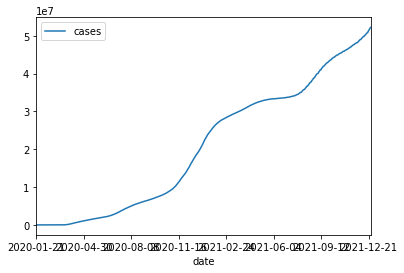

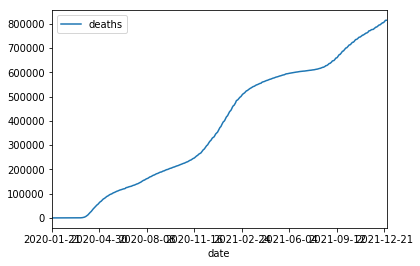

In [19]:

a.plot(x = 'date',y= 'cases')
plt.show()
a.plot(x = 'date',y= 'deaths')
plt.show()

In [73]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\salik\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [76]:
state_dif = pd.read_csv('State_diff.csv')
state_dif

,Unnamed: 0,date,state,cases_dif,deaths_dif
0,0,2020-01-21,Washington,NaN,NaN
1,1,2020-01-22,Washington,0.0,0.0
2,2,2020-01-23,Washington,0.0,0.0
3,4,2020-01-24,Washington,0.0,0.0
4,7,2020-01-25,Washington,0.0,0.0
5,11,2020-01-26,Washington,0.0,0.0
6,15,2020-01-27,Washington,0.0,0.0
7,19,2020-01-28,Washington,0.0,0.0
8,23,2020-01-29,Washington,0.0,0.0
9,27,2020-01-30,Washington,0.0,0.0


In [66]:
import plotly.graph_objects as go # Plotting
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [74]:
us_dif = pd.read_csv('US_diff.csv')
display(us_dif.head())
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['Covid Cases in US', 'Covid Deaths in US'])
fig.add_trace(
    go.Bar(x= us_dif['date'], y= us_dif['cases_dif'], name='Cases',showlegend=False)
    ,row=1, col=1)
fig.add_trace(
    go.Bar(x= us_dif['date'], y= us_dif['deaths_dif'], name='Deaths',showlegend=False)
    ,row=2, col=1)
fig.update_layout({'title': {'text': 'Covid Cases and Deaths in the US', 'x': .5, 'y': .9}})
fig.show()

,Unnamed: 0,date,cases_dif,deaths_dif
0,0,2020-01-21,NaN,NaN
1,1,2020-01-22,0.0,0.0
2,2,2020-01-23,0.0,0.0
3,3,2020-01-24,1.0,0.0
4,4,2020-01-25,1.0,0.0


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [18]:
b.groupby('state')['cases'].sum().sort_values().reset_index().set_index('state')

,cases
state,
American Samoa,97
Northern Mariana Islands,138238
Virgin Islands,1871372
Guam,5183204
Vermont,10418897
Hawaii,19781667
District of Columbia,22240037
Maine,27825471
Wyoming,28618121


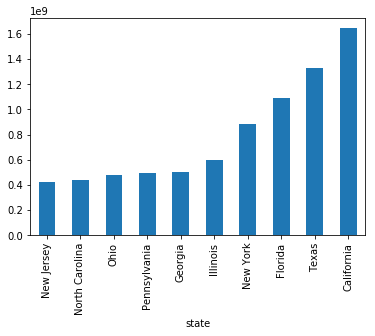

In [32]:
b.groupby('state')['cases'].sum().sort_values().tail(10).plot(kind='bar')

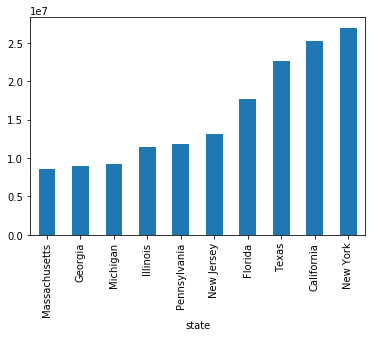

In [33]:
b.groupby('state')['deaths'].sum().sort_values().tail(10).plot(kind='bar')

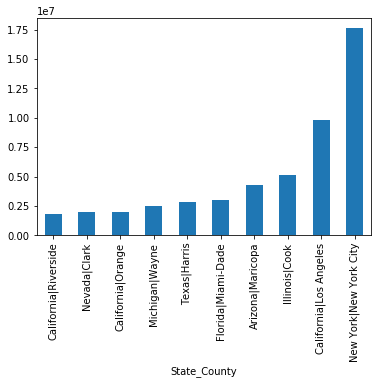

In [47]:
c.groupby('State_County')['deaths'].sum().sort_values().tail(10).plot(kind='bar')